In [6]:
import essentia
import essentia.standard
import essentia.streaming
from essentia.standard import *
import matplotlib.pyplot as plt
import numpy as np
import IPython
import pydub
from essentia.standard import MelBands
import pandas as pd
from pylab import plot, show, figure, imshow

[   INFO   ] MusicExtractorSVM: no classifier models were configured by default


In [8]:
from tqdm import tqdm_notebook as tq

In [2]:
import os

path = "./rnbmusic/rnb"
file_lst = os.listdir(path)
# 현재 디렉토리내에 모든 파일 출력
print(file_lst) # ['test1.text','test2.text','test3.text','.ipynb_checkpoints','test4.text','test.ipynb','test5.text']

# 현재 디렉토리내에 각각의 파일을 출력
for file in file_lst:
    filepath = path + '/' + file
    print(file)

['Ginuwine - Inside Of You (Prod. by B.Cox) (Written by. Rico Love).mp3', 'Permission.mp3', "Betty Wright - Thank You For The Many Things You've Done.mp3", 'DAVE HOLLISTER-FOREVER.mp3', 'Remy Boyz - My Way RMX Ft. Drake.mp3', 'Get You (feat. Kali Uchis).mp3', "Lookin' 4 Ya (Jedi Remix, feat. Andre 3000 & Sleepy Brown).mp3", 'urban mystic-in the morning.mp3', 'Migos - Emmit Smith.mp3', 'Mint condition- nothing left to say.mp3', 'I Tried.mp3', 'Summer Friends (feat. Jeremih & Francis & The Lights).mp3', 'Estelle - American Boy [Feat. Kanye West] Album Version).mp3', 'anymore..mp3', 'Beauty & Essex (feat. Daniel Caesar & Unknown Mortal Orchestra).mp3', 'All of Me (John Legend Cover).mp3', 'Drake - Trust Issues (Take Care Album) [NEW SONG 2011].mp3', 'Jaheim, Remarkable.mp3', "JMSN - Drinkin'.mp3", "Travi$ Scott Ft. Big Sean + The 1975 - Don't Play.mp3", 'Faint - RealifeOtto(Ft. ShakkaDavis & Eazy).mp3', 'Iyanya - Some More [Ft. Yung L].mp3', 'Gentleman.mp3', 'Spince Seseme Ft Ali Kiba - A

In [16]:
file_lst[106]

'Drake _ Draft Day.mp3'

/tmp/ipykernel_2550/3013602345.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tq(range(0,107)):


  0%|          | 0/107 [00:00<?, ?it/s]

[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   IN

[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   IN

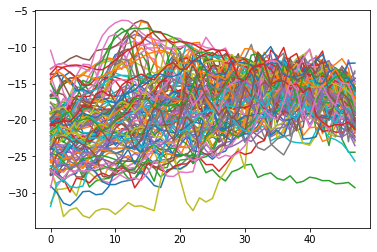

In [17]:
for i in tq(range(0,107)):
    loader = essentia.standard.MonoLoader(filename='rnbmusic/rnb/'+file_lst[i], sampleRate=1750)
    audio = loader()

    w = Windowing(type = 'hann')
    spectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
    melbands = MelBands(numberBands=48,
                weighting='linear',
                warpingFormula='slaneyMel',
                normalize='unit_tri')
    
    frame = audio[6*2000 : 6*2000 + 512]
    spec = spectrum(w(frame))
    mel_bands = melbands(spec)
    logNorm = UnaryOperator(type='log')
    plot(logNorm(mel_bands))
    melspec = []
    melspec_log = []
    for frame in FrameGenerator(audio, frameSize=512, hopSize=256, startFromZero=True):
        mel_bands = melbands(spectrum(w(frame)))
        melspec.append(mel_bands)
        melspec_log.append(logNorm(mel_bands))

# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)
    melspec = essentia.array(melspec).T
    melspec_log = essentia.array(melspec_log).T
    df = pd.DataFrame(melspec_log)
    df.T
    np.save('rnbmusic/mel/'+file_lst[i], melspec_log)

In [18]:
npy_array = np.load(file="rnbmusic/mel/Aaliyah - Are You That Somebody.mp3.npy")

In [19]:
np = pd.DataFrame(npy_array)

In [21]:
np.T

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-30.938572,-32.571106,-32.598450,-33.870926,-32.593529,-32.678814,-32.088608,-31.722370,-31.865784,-31.850384,...,-33.052273,-32.979298,-33.284466,-33.196514,-33.448009,-33.967369,-33.740616,-33.235317,-33.427460,-34.376919
1,-30.478447,-32.733051,-33.244629,-32.133400,-31.793840,-32.797958,-34.024277,-33.112862,-32.762753,-32.274635,...,-32.430820,-33.801643,-34.069164,-34.099648,-34.166294,-33.749207,-34.055099,-33.388355,-33.545933,-33.643909
2,-30.091852,-32.573608,-33.888718,-33.172886,-32.085361,-31.940960,-31.954964,-32.143013,-32.557350,-33.025234,...,-35.036278,-35.188152,-34.404716,-34.225834,-34.853931,-35.203156,-34.153606,-33.803219,-33.357254,-34.366810
3,-30.546804,-32.956757,-32.365784,-32.218372,-32.774395,-33.131203,-33.344208,-33.795929,-34.347500,-34.948437,...,-34.828480,-35.581215,-34.713535,-34.415646,-34.548691,-34.895088,-34.626144,-34.232578,-34.251534,-35.633289
4,-32.154800,-34.795807,-35.503246,-34.262581,-35.482758,-37.072075,-36.828831,-37.578453,-36.762024,-35.636631,...,-35.014908,-34.919434,-35.203609,-34.731453,-34.893002,-35.158699,-34.641014,-34.611469,-34.096630,-34.813789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,-23.198837,-24.400446,-21.390318,-21.309740,-21.774254,-21.902983,-20.965658,-21.428894,-20.987089,-20.855059,...,-26.189880,-23.062332,-24.078300,-27.533909,-24.704456,-25.689444,-26.800760,-26.655581,-27.393154,-27.789669
1852,-23.331453,-20.878139,-20.841572,-19.521765,-19.491117,-20.555307,-21.536924,-20.838926,-20.868248,-20.777191,...,-26.187481,-23.241873,-24.301792,-27.375141,-25.080252,-26.078348,-27.117109,-27.009502,-27.470858,-27.853947
1853,-23.161274,-22.375467,-21.984470,-20.402639,-20.241144,-20.619997,-20.657789,-20.349010,-20.394758,-20.817539,...,-26.643509,-23.457891,-24.460114,-27.113895,-25.113697,-26.074268,-26.827684,-26.538113,-27.464001,-27.933411
1854,-26.597425,-26.827976,-27.280722,-27.904984,-27.790640,-26.887194,-26.187023,-25.800789,-25.693317,-25.851995,...,-29.066048,-27.137562,-27.857113,-29.537365,-29.378393,-30.322655,-29.753487,-29.941515,-31.825260,-32.425358


[   INFO   ] TriangularBands: input spectrum size (257) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.


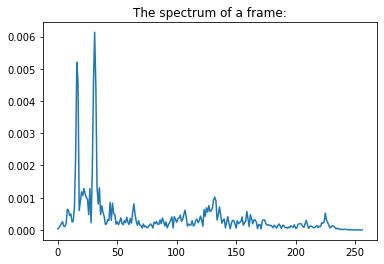

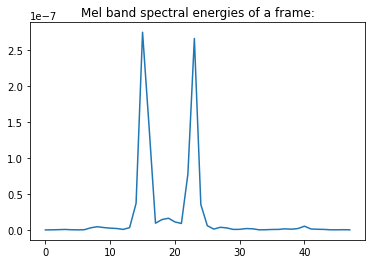

In [21]:

    frame = audio[6*2000 : 6*2000 + 512]
    spec = spectrum(w(frame))
    mel_bands = melbands(spec)

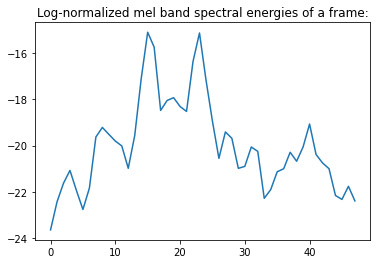

In [22]:
    logNorm = UnaryOperator(type='log')
    plot(logNorm(mel_bands))
    plt.title("Log-normalized mel band spectral energies of a frame:")
    show()

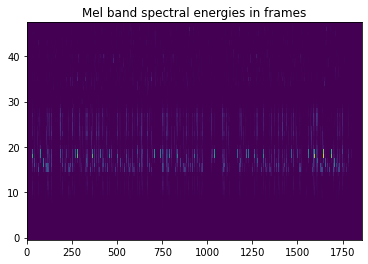

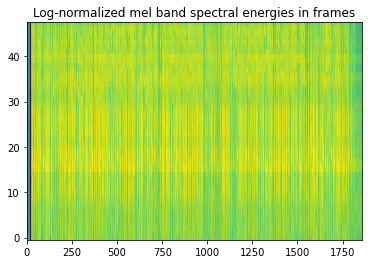

In [23]:
    melspec = []
    melspec_log = []

        for frame in FrameGenerator(audio, frameSize=512, hopSize=256, startFromZero=True):
            mel_bands = melbands(spectrum(w(frame)))
            melspec.append(mel_bands)
            melspec_log.append(logNorm(mel_bands))

# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)
    melspec = essentia.array(melspec).T
    melspec_log = essentia.array(melspec_log).T
    df = pd.DataFrame(melspec_log)
    df.T
    np.save('rnbmusic/mel/'+file_lst[i]', melspec_log)

In [24]:
melspec

array([[3.6605704e-14, 5.7993446e-14, 8.5364001e-14, ..., 8.7334660e-11,
        2.8111580e-12, 0.0000000e+00],
       [7.1539835e-15, 6.0843745e-15, 7.1361035e-15, ..., 1.9162763e-10,
        2.2323278e-12, 0.0000000e+00],
       [6.9610205e-15, 3.6478871e-15, 1.9156514e-15, ..., 2.8331268e-10,
        1.4194932e-12, 0.0000000e+00],
       ...,
       [3.6820179e-15, 3.1595244e-15, 2.0866439e-15, ..., 2.9829368e-12,
        9.9212278e-14, 0.0000000e+00],
       [3.0383618e-15, 2.6988952e-15, 3.2593309e-15, ..., 1.1817790e-12,
        1.5082208e-14, 0.0000000e+00],
       [1.1756944e-15, 2.4470098e-15, 1.1876368e-15, ..., 7.3904956e-13,
        8.2765012e-15, 0.0000000e+00]], dtype=float32)

In [25]:
melspec_log

array([[-30.938572, -30.478447, -30.091852, ..., -23.161274, -26.597425,
        -69.07755 ],
       [-32.571106, -32.73305 , -32.57361 , ..., -22.375467, -26.827976,
        -69.07755 ],
       [-32.59845 , -33.24463 , -33.888718, ..., -21.98447 , -27.280722,
        -69.07755 ],
       ...,
       [-33.235317, -33.388355, -33.80322 , ..., -26.538113, -29.941515,
        -69.07755 ],
       [-33.42746 , -33.545933, -33.357254, ..., -27.464   , -31.82526 ,
        -69.07755 ],
       [-34.37692 , -33.64391 , -34.36681 , ..., -27.93341 , -32.425358,
        -69.07755 ]], dtype=float32)

In [26]:
df = pd.DataFrame(melspec_log)

In [27]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-30.938572,-32.571106,-32.598450,-33.870926,-32.593529,-32.678814,-32.088608,-31.722370,-31.865784,-31.850384,...,-33.052273,-32.979298,-33.284466,-33.196514,-33.448009,-33.967369,-33.740616,-33.235317,-33.427460,-34.376919
1,-30.478447,-32.733051,-33.244629,-32.133400,-31.793840,-32.797958,-34.024277,-33.112862,-32.762753,-32.274635,...,-32.430820,-33.801643,-34.069164,-34.099648,-34.166294,-33.749207,-34.055099,-33.388355,-33.545933,-33.643909
2,-30.091852,-32.573608,-33.888718,-33.172886,-32.085361,-31.940960,-31.954964,-32.143013,-32.557350,-33.025234,...,-35.036278,-35.188152,-34.404716,-34.225834,-34.853931,-35.203156,-34.153606,-33.803219,-33.357254,-34.366810
3,-30.546804,-32.956757,-32.365784,-32.218372,-32.774395,-33.131203,-33.344208,-33.795929,-34.347500,-34.948437,...,-34.828480,-35.581215,-34.713535,-34.415646,-34.548691,-34.895088,-34.626144,-34.232578,-34.251534,-35.633289
4,-32.154800,-34.795807,-35.503246,-34.262581,-35.482758,-37.072075,-36.828831,-37.578453,-36.762024,-35.636631,...,-35.014908,-34.919434,-35.203609,-34.731453,-34.893002,-35.158699,-34.641014,-34.611469,-34.096630,-34.813789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,-23.198837,-24.400446,-21.390318,-21.309740,-21.774254,-21.902983,-20.965658,-21.428894,-20.987089,-20.855059,...,-26.189880,-23.062332,-24.078300,-27.533909,-24.704456,-25.689444,-26.800760,-26.655581,-27.393154,-27.789669
1852,-23.331453,-20.878139,-20.841572,-19.521765,-19.491117,-20.555307,-21.536924,-20.838926,-20.868248,-20.777191,...,-26.187481,-23.241873,-24.301792,-27.375141,-25.080252,-26.078348,-27.117109,-27.009502,-27.470858,-27.853947
1853,-23.161274,-22.375467,-21.984470,-20.402639,-20.241144,-20.619997,-20.657789,-20.349010,-20.394758,-20.817539,...,-26.643509,-23.457891,-24.460114,-27.113895,-25.113697,-26.074268,-26.827684,-26.538113,-27.464001,-27.933411
1854,-26.597425,-26.827976,-27.280722,-27.904984,-27.790640,-26.887194,-26.187023,-25.800789,-25.693317,-25.851995,...,-29.066048,-27.137562,-27.857113,-29.537365,-29.378393,-30.322655,-29.753487,-29.941515,-31.825260,-32.425358


In [10]:
np.save('melspec', melspec_log)

In [ ]:
loader = essentia.standard.MonoLoader(filename='Simply-Red-Holding-Back-The-Years.mp3', sampleRate=2000)
audio = loader()

from essentia.standard import *
w = Windowing(type = 'hann')
spectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
melbands = MelBands(numberBands=48,
            weighting='linear',
            warpingFormula='slaneyMel',
            normalize='unit_tri')

from pylab import plot, show, figure, imshow
frame = audio[6*2000 : 6*2000 + 512]
spec = spectrum(w(frame))
mel_bands = melbands(spec)

plot(spec)
plt.title("The spectrum of a frame:")
show()

plot(mel_bands)
plt.title("Mel band spectral energies of a frame:")
show()

logNorm = UnaryOperator(type='log')
plot(logNorm(mfcc_bands))
plt.title("Log-normalized mel band spectral energies of a frame:")
show()

melspec = []
melspec_log = []

for frame in FrameGenerator(audio, frameSize=512, hopSize=256, startFromZero=True):
    mel_bands = melbands(spectrum(w(frame)))
    melspec.append(mel_bands)
    melspec_log.append(logNorm(mel_bands))

# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)
melspec = essentia.array(melspec).T
melspec_log = essentia.array(melspec_log).T

# and plot
imshow(melspec[:,:], aspect = 'auto', origin='lower', interpolation='none')
plt.title("Mel band spectral energies in frames")
show()

imshow(melspec_log[:,:], aspect = 'auto', origin='lower', interpolation='none')
plt.title("Log-normalized mel band spectral energies in frames")
show()



melspec

melspec_log

df = pd.DataFrame(melspec_log)

df.T

np.save('melspec', melspec_log)